In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Scaling

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [5]:
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

In [6]:
df_norm = norm_func(crime.iloc[:,1:])

In [7]:
df_norm.iloc[:,:].head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


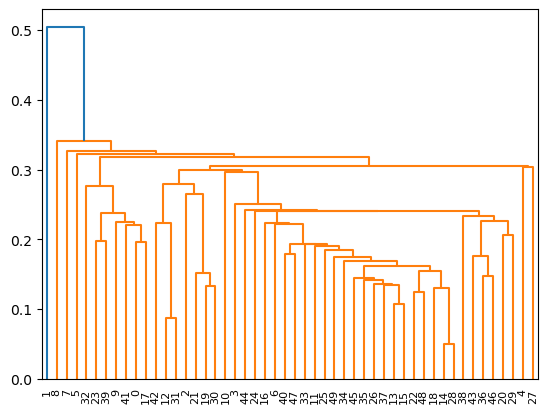

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

In [9]:
crimehc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage = 'single')

In [10]:
crime_hc=crimehc.fit_predict(df_norm)

In [11]:
crime['h_clusterid'] = crime_hc
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [12]:
crime.groupby(["h_clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: Unnamed: 0, dtype: object

## K Means Clustring

In [13]:
from sklearn.cluster import KMeans

In [14]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
df_norm = norm_func(crime.iloc[:,1:])

In [16]:
model_kmeans = KMeans(n_clusters = 5)
crime_scaled = model_kmeans.fit(df_norm)

In [17]:
model_kmeans.labels_

array([3, 4, 4, 1, 4, 4, 0, 1, 4, 3, 0, 2, 4, 1, 2, 1, 1, 3, 2, 4, 0, 4,
       2, 3, 1, 2, 2, 4, 2, 0, 4, 4, 3, 2, 0, 1, 1, 0, 0, 3, 2, 3, 4, 0,
       2, 1, 0, 2, 2, 1])

In [18]:
md  = pd.Series(model_kmeans.labels_)

In [19]:
crime["labels"]=pd.Series(model_kmeans.labels_)
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,4


In [20]:
crime.groupby(["labels"])["Unnamed: 0"].apply(lambda x:tuple(x))

labels
0    (Connecticut, Hawaii, Massachusetts, New Jerse...
1    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
2    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4    (Alaska, Arizona, California, Colorado, Florid...
Name: Unnamed: 0, dtype: object

In [21]:
model_kmeans.cluster_centers_

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

### Inferences 

In [22]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'labels'], dtype='object')

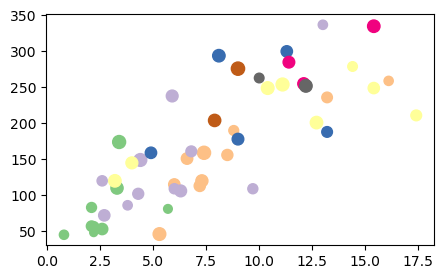

In [23]:
plt.figure(figsize=(5,3))
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],crime["Rape"],cmap=plt.cm.Accent)

### Using Hierarchical

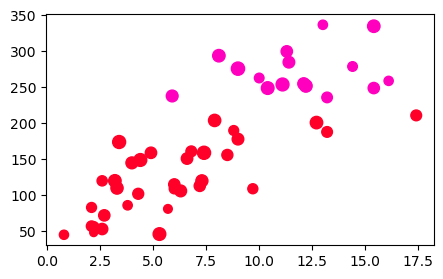

In [24]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.figure(figsize=(5,3))
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],c=cluster.fit_predict(crime.iloc[:,[1,2,3]]),cmap=plt.cm.gist_rainbow)

### using KMeans

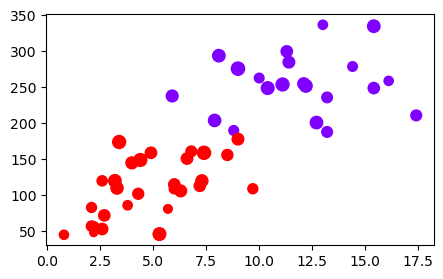

In [25]:
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(crime.iloc[:,1:4])
plt.figure(figsize=(5,3))
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],c=model.labels_,cmap=plt.cm.rainbow)

In [26]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### DBSCAN

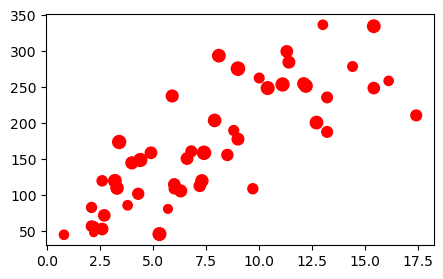

In [27]:
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(crime.iloc[:,1:5])
plt.figure(figsize=(5,3))
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],c=class_pr,cmap=plt.cm.rainbow_r)

### Finding the optimal number of clusters

In [28]:
df1 = pd.read_csv("crime_data.csv")
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [29]:
nc = [1,2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(df1.iloc[:,[1,2,3,4]])
    iner.append(km.inertia_)

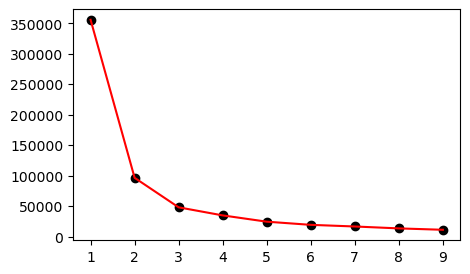

In [30]:
plt.figure(figsize=(5,3))
plt.plot(nc,iner,color="red")
plt.scatter(nc,iner,color="black")
plt.show()

### Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score as sil

In [32]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(crime.iloc[:,[1,2,3]])
    sc_score.append(sil(crime.iloc[:,[1,2,3]],y))

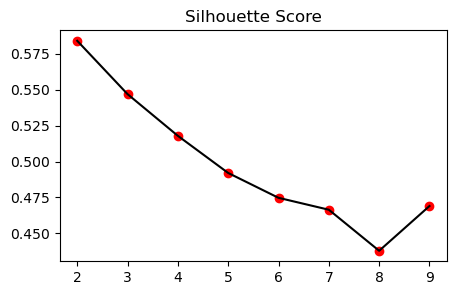

In [33]:
plt.figure(figsize=(5,3))
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.title("Silhouette Score")
plt.show()